In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
wiedth = 224
hieght = 224
batch_size = 32
CHANNELS = 3

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "G:/DL datasets/ChickenDisease_Dataset",
    shuffle= True,
    image_size = (wiedth, hieght),
    batch_size = batch_size
)

Found 8067 files belonging to 8 classes.


In [3]:
class_names = dataset.class_names
class_names

['cocci',
 'healthy',
 'ncd',
 'pcrcocci',
 'pcrhealthy',
 'pcrncd',
 'pcrsalmo',
 'salmo']

In [4]:
len(dataset)

253

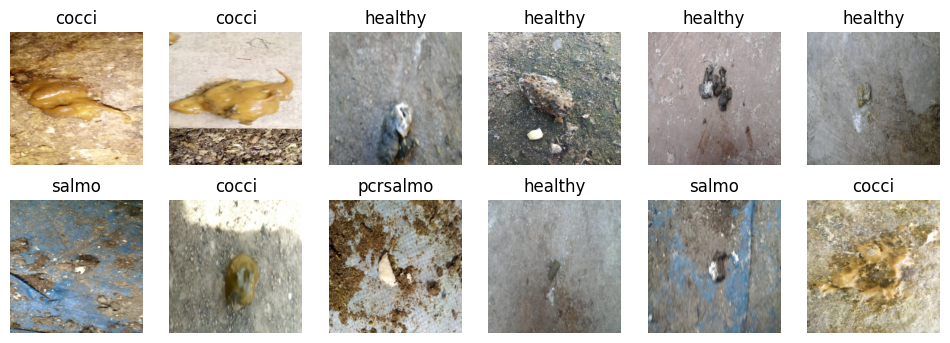

In [5]:
plt.figure(figsize=(12,4))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(2,6, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(f'{class_names[label_batch[i]]}')
        plt.axis('off')

we want to take 80% of the dataset for training.
the rest 20% will split to: 10% for validation and 10% for testing.

In [6]:
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, shuffle=True, shuflfe_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuflfe_size, seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

print(len(train_ds), len(val_ds), len(test_ds))

202 25 26


In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [9]:
# data preprocessing

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(wiedth, hieght),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])